    The Goal is to predict whether a person has an income of more than 50K a year or not.This is basically a binary   classification problem where a person is classified into the two group one is less than and equal

# Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Dtypes](#Converting_Date)
    - 3.4 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.5 - [Checking and Labeling the data](#Indexing_with_Date)
4. **[Data Exploration](#x1)**
5. **[Corelation check](#Indexing_with_Date2)**
    - 5.1 - [Corelation for Numerical features](#s1)
    - 5.2 - [Corelation for categorical features](#s2)
6. **[Encoding(ordinal_encoder)](#a3))**
7. **[Model Building](#a4)**
    - 7.1 - [splitting the features for Dependent and Independent](#a5)
    - 7.2 - [Splitting the dataset in train,test](#b5)
    - 7.3 - [Scaling the Splitted dataset](#a6)
8. **[Machine Learning Algorithm and Hyperparameter tuning](#z1)**
    - 8.1 - [Logistic Regression](#z3)
        - 8.1.1 - [Fitting Logistic Regression](#c1)
        - 8.1.2 - [Score check](#c2)
        - 8.1.3 - [predict](#c3)
        - 8.1.4 - [Hyperparameter tuning](#c4)
        - 8.1.5 - [Best Parameter](#c5)
        - 8.1.6 - [Final accuracy](#c6)
    - 8.2 - [Training and evaluation from Random forest classifier](#z)
        - 8.2.1 - [Fitting Logistic Regression](#c11)
        - 8.2.2 - [Score check](#c22)
        - 8.2.3 - [predict](#c33)
        - 8.2.4 - [Hyperparameter tuning](#c44)
        - 8.2.5 - [Best Parameter](#c55)
        - 8.2.6 - [Final accuracy](#c66)
9. **[Conclusion](#d1)**
10. **[Deployment (saving pkl file of model](#d2)**

<a id='import_packages'></a>
# 1. Import Packages  

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

<a id='load_data'></a>
# 2. Load Data and Copy

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
df = data.copy()

In [4]:
df.head(1)

age   workclass  fnlwgt   education  education-num  marital-status  \
0   39   State-gov   77516   Bachelors             13   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male          2174             0   

   hours-per-week         country  salary  
0              40   United-States   <=50K

 The data set contains adult census income 

<a id='data_preparation'></a>
# 3. Data Preparation

Prepare the data set to visulaize and building the model

<a id='data_dimension'></a>
## 3.1. Dimensions of Dataset

In [5]:
data.shape

(32561, 15)

<a id='Stat_sum'></a>
## 3.2 Statistical Summary

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [7]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [8]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

In [10]:
df.describe(include='object').T

count unique                  top   freq
workclass       32561      9              Private  22696
education       32561     16              HS-grad  10501
marital-status  32561      7   Married-civ-spouse  14976
occupation      32561     15       Prof-specialty   4140
relationship    32561      6              Husband  13193
race            32561      5                White  27816
sex             32561      2                 Male  21790
country         32561     42        United-States  29170
salary          32561      2                <=50K  24720

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<a id='Converting_Date'></a>
## 3.3 Dtypes

In [12]:
df.dtypes[df.dtypes=="object"]

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
country           object
salary            object
dtype: object

In [13]:
a=df.dtypes[df.dtypes!="object"]
a

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

<a id='check_data_type'></a>
## 3.4 Checking Data Type and Missing Values

In [14]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

**Dropping the columns that is logically not related to the target variable**

In [15]:
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)

In [16]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
country           0
salary            0
dtype: int64

<a id='Indexing_with_Date'></a>
## 3.5 Checking and Labeling the data

In [17]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [18]:
#encoding salary column
#df['salary']=df['salary'].replace('<=50K',0)
df['salary']=df['salary'].replace('>50K',1)

In [19]:
#people whose earning less than 50K
df[df['salary']==0].shape

(0, 12)

In [20]:
#people whose earning more than 50K
df[df['salary']==1].shape

(7841, 12)

<a id='x1'></a>
# 4. Data Exploration

In [21]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [22]:
data['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Here observerd that ?sign in the rows so i treated this

In [23]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [24]:
df.shape

(30162, 12)

In [25]:
#doing private job and salary more than 50K
new_df=df[df['workclass']=='Private']
print(len(new_df[new_df['salary']==1]))
new_df[new_df['salary']==1].head(2)

4876


age workclass  education  education-num      marital-status  \
8   31   Private    Masters             14       Never-married   
9   42   Private  Bachelors             13  Married-civ-spouse   

        occupation   relationship   race     sex  hours-per-week  \
8   Prof-specialty  Not-in-family  White  Female              50   
9  Exec-managerial        Husband  White    Male              40   

         country salary  
8  United-States      1  
9  United-States      1

- so there is 4876 people are doing job in private class and earn more than 50K

<AxesSubplot:xlabel='salary'>

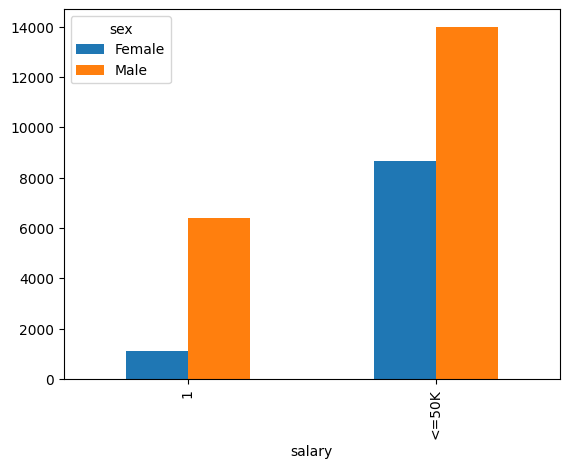

In [26]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['salary'],df['sex'])
class_sex.plot(kind='bar')

In [27]:
df['workclass'].value_counts()

workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

In [28]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==1]))
avg_age[avg_age['salary']==1].head(2)

5042


age         workclass  education  education-num      marital-status  \
7   52  Self-emp-not-inc    HS-grad              9  Married-civ-spouse   
9   42           Private  Bachelors             13  Married-civ-spouse   

        occupation relationship   race   sex  hours-per-week        country  \
7  Exec-managerial      Husband  White  Male              45  United-States   
9  Exec-managerial      Husband  White  Male              40  United-States   

  salary  
7      1  
9      1

- so there is '5042' people whose age is greater than average age earning more than 50K

In [29]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==0]))
avg_age[avg_age['salary']==0].head()

0


Empty DataFrame
Columns: [age, workclass, education, education-num, marital-status, occupation, relationship, race, sex, hours-per-week, country, salary]
Index: []

- so there is '8911' people whose age is greater than average age earning less than 50K

<AxesSubplot:xlabel='salary'>

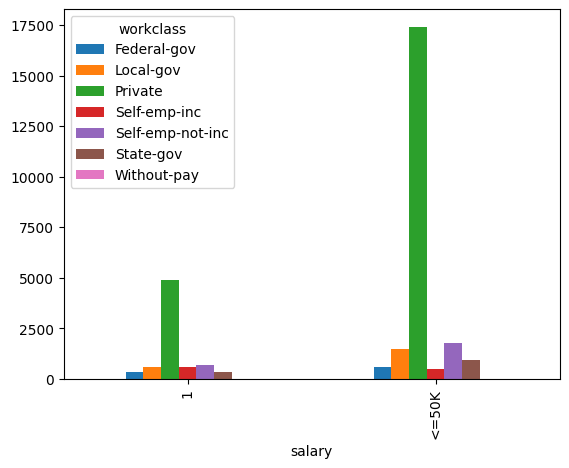

In [30]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(df['salary'],df['workclass'])
class_salary.plot(kind='bar')

- so we can clearly see that private class people is more than other classes in both type of category of salary

<AxesSubplot:xlabel='education'>

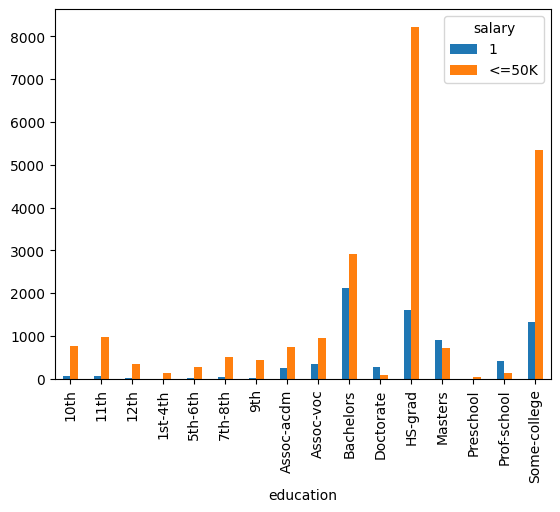

In [31]:
#cheacking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['salary'])
salary_education.plot(kind='bar')

In [32]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

        
num_col = num_col[0:2]
num_col 

['age', 'education-num']

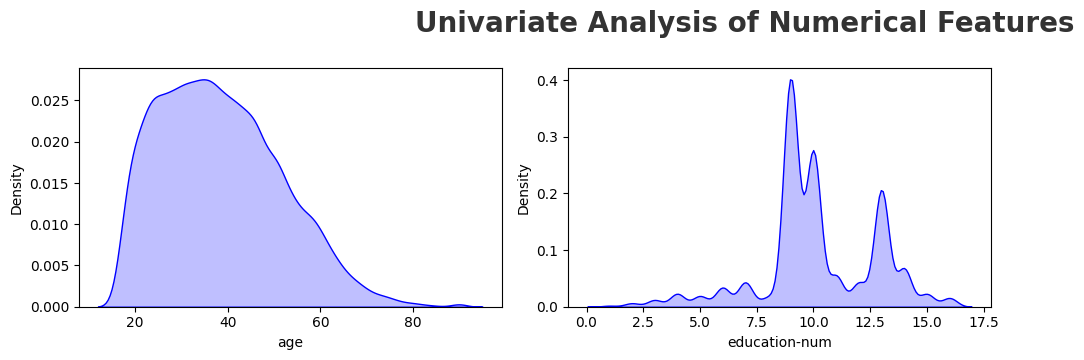

In [33]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [34]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col        

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

<Figure size 640x480 with 0 Axes>

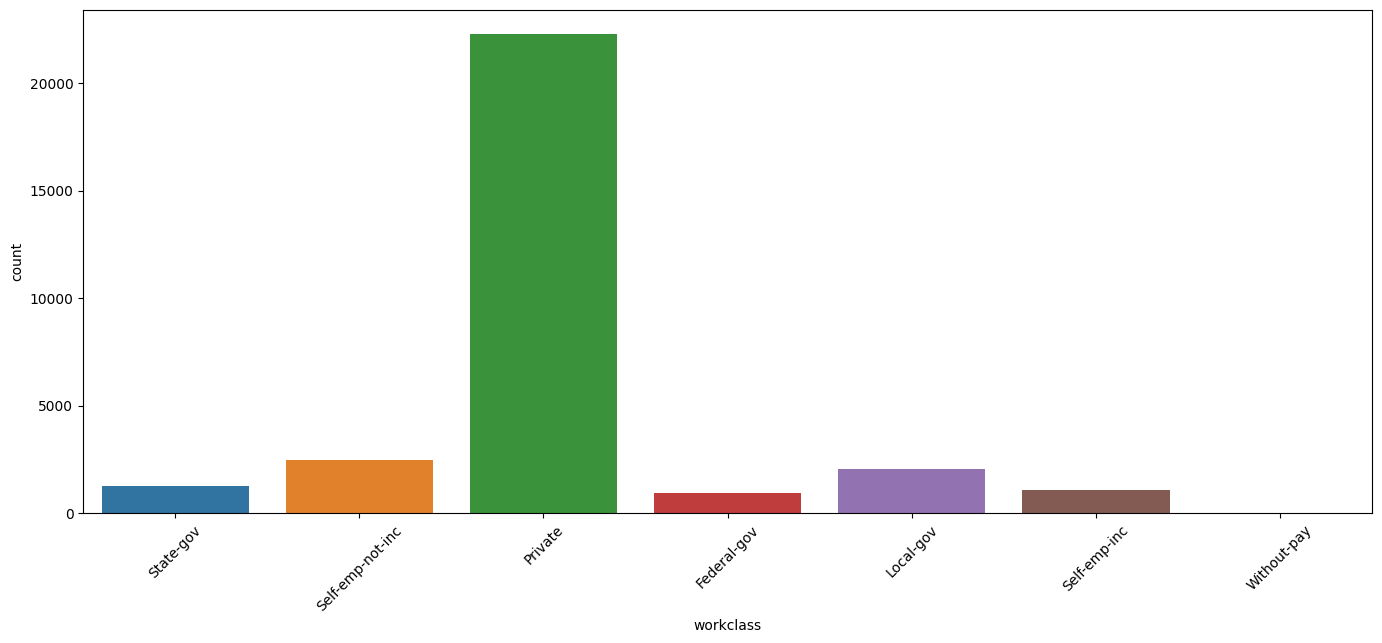

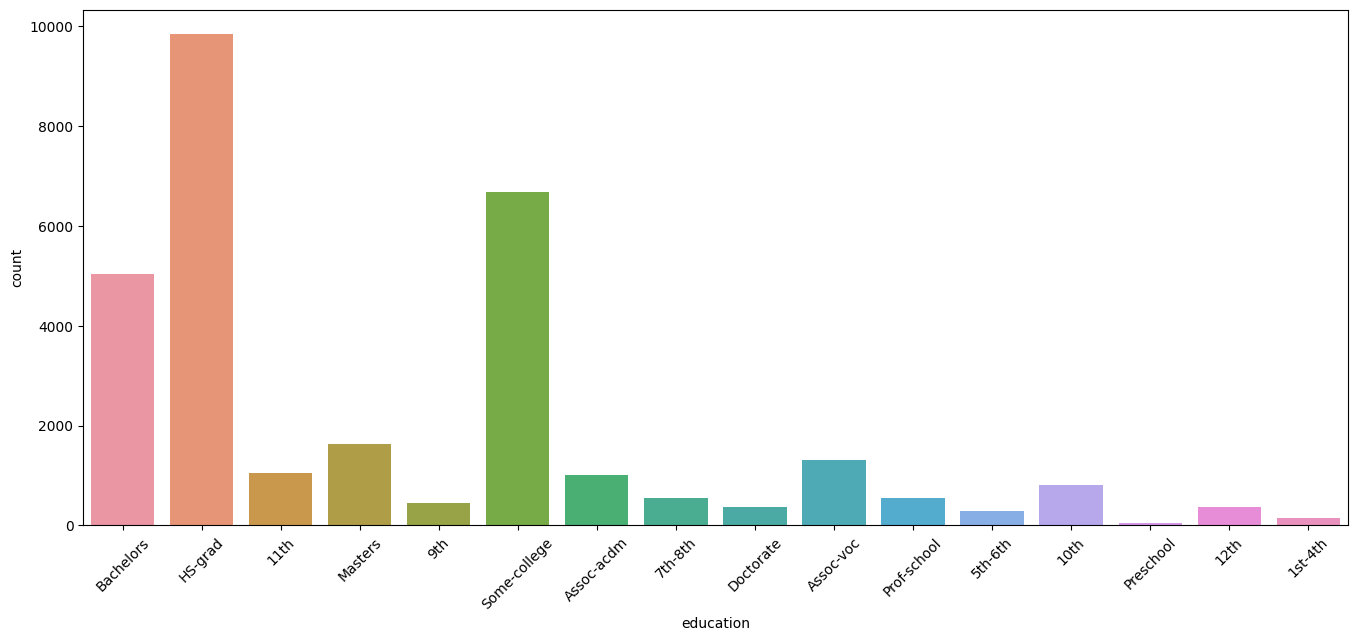

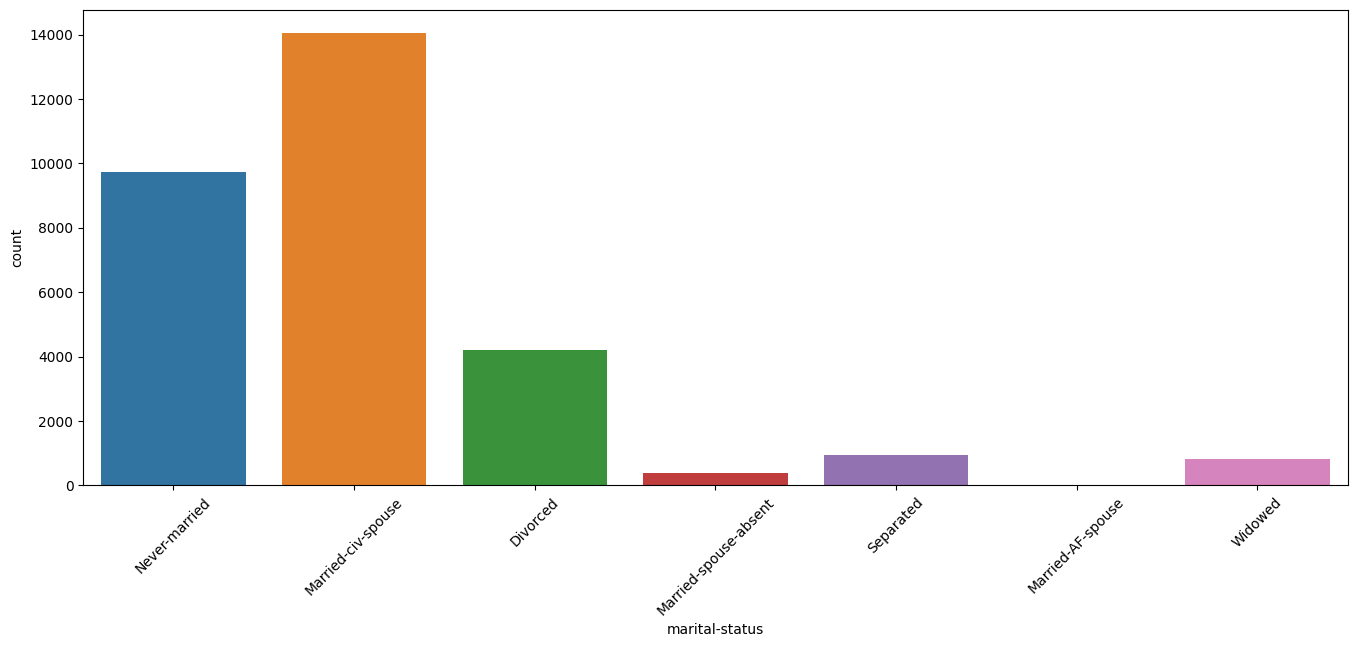

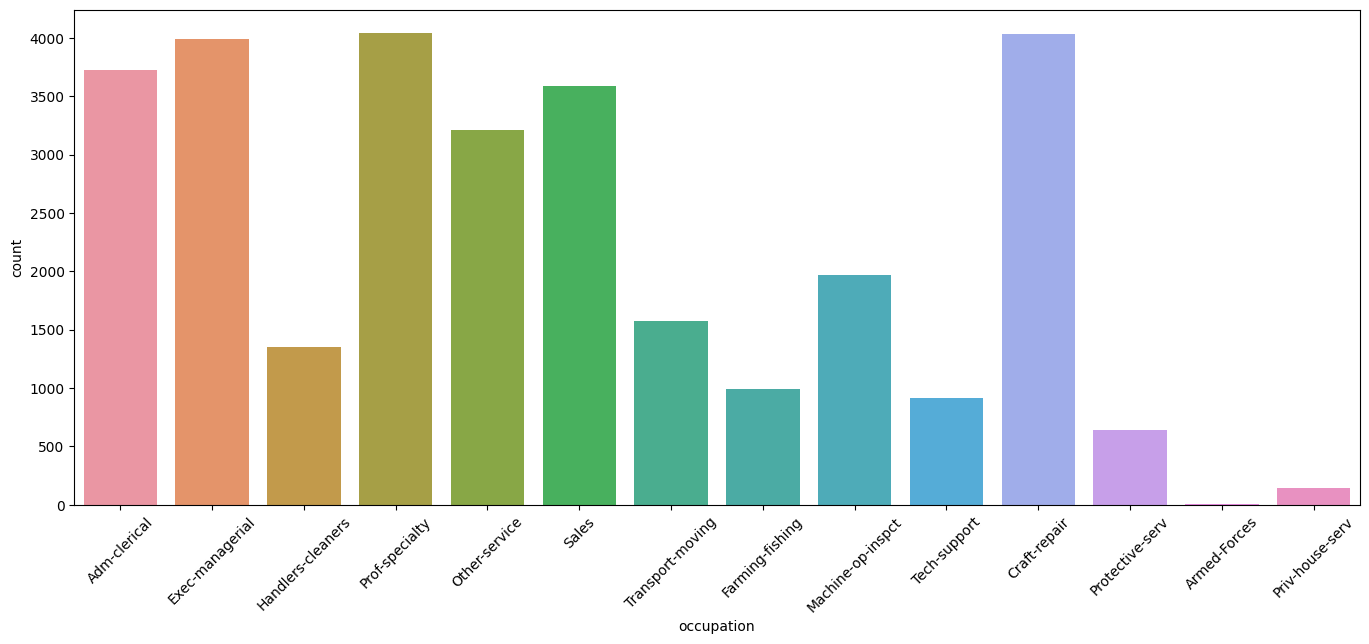

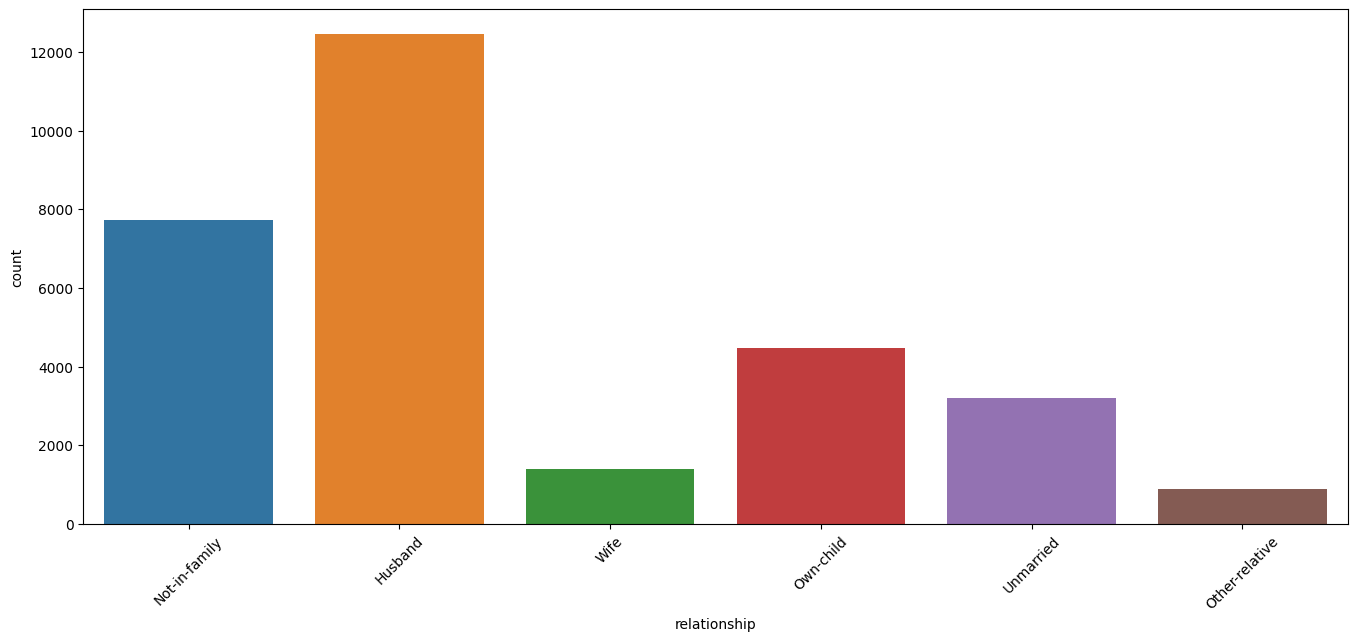

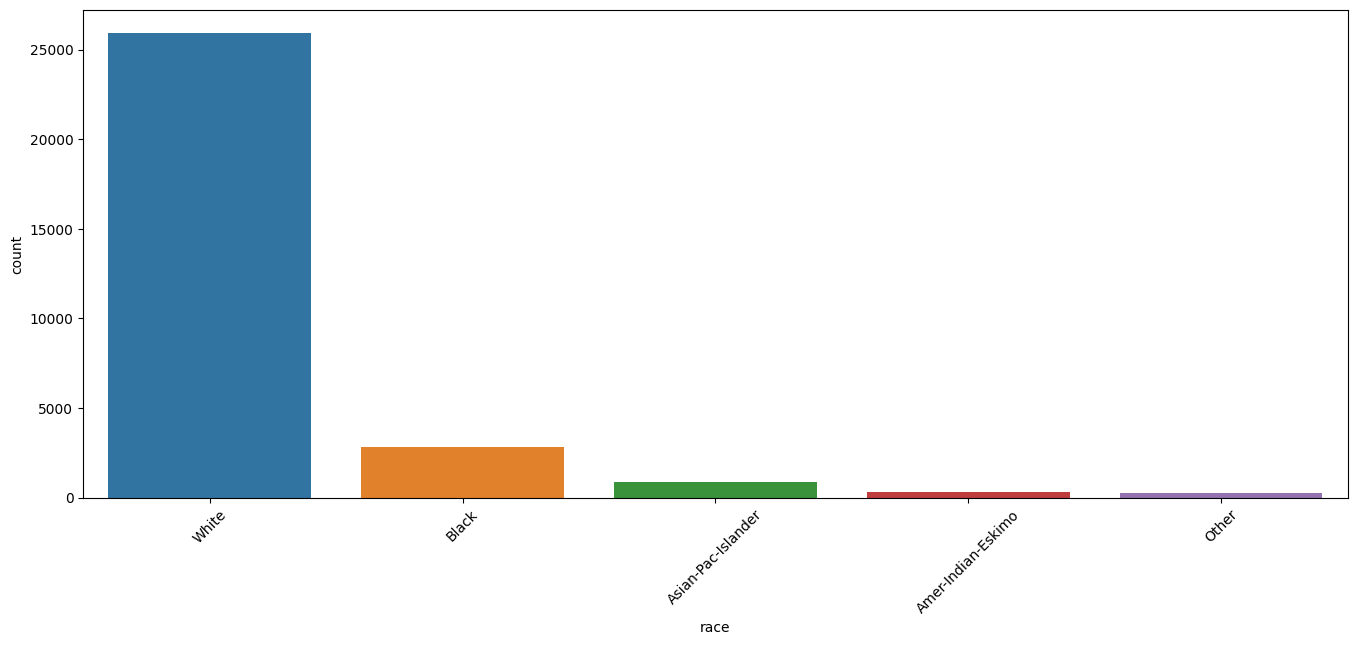

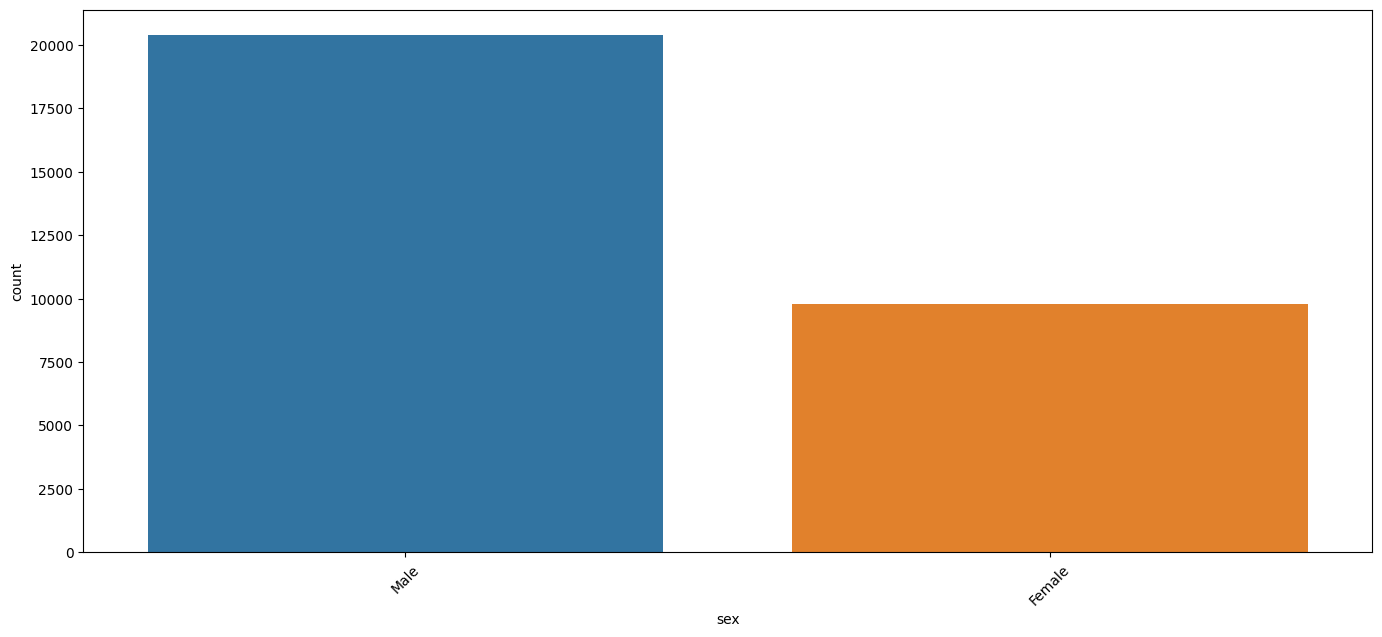

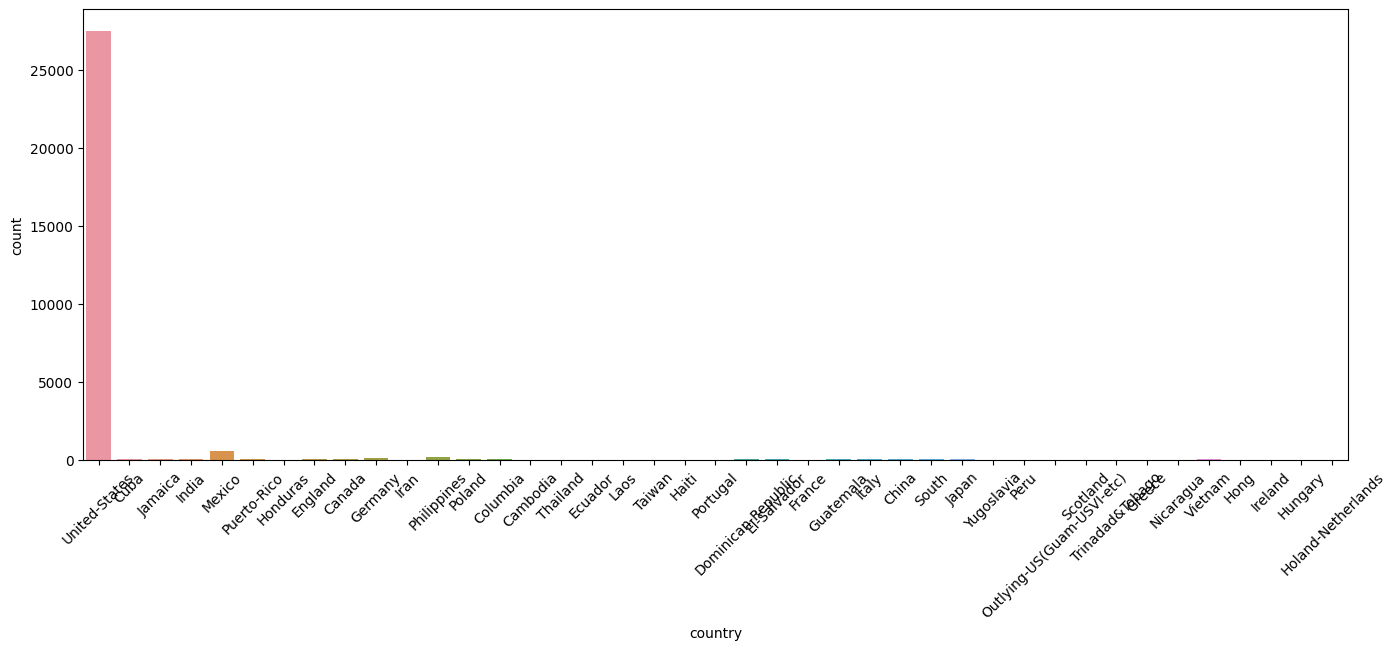

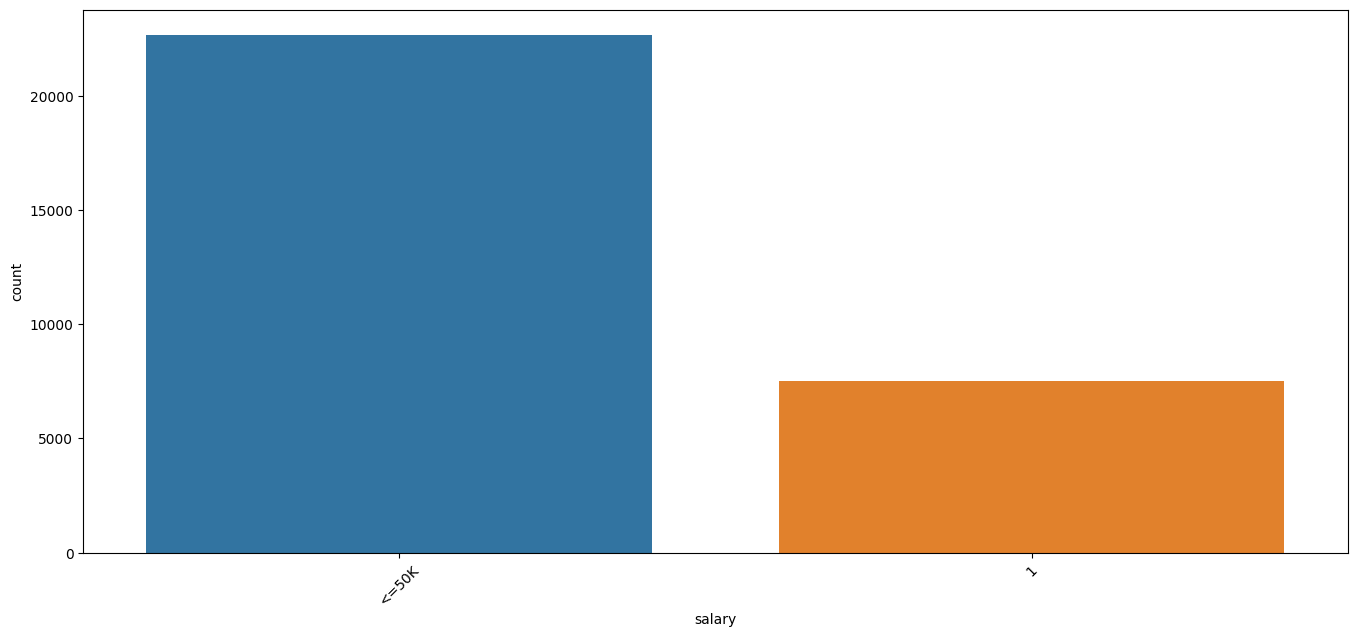

In [35]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<a id='Indexing_with_Date2'></a>
# 5. corelation check

<a id='s1'></a>
## 5.1 corelation with Numerical features

#### Check collinearity in Numerical features¶

In [36]:
df[num_col].corr()

age  education-num
age            1.000000       0.043526
education-num  0.043526       1.000000

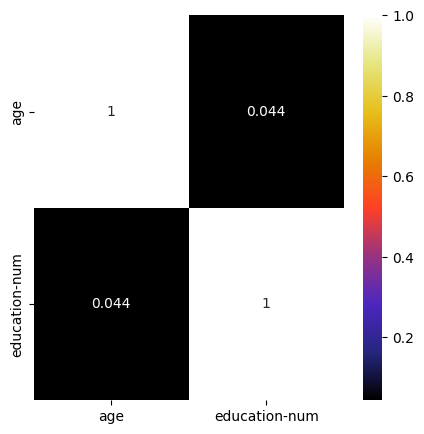

In [37]:
plt.figure(figsize = (5,5))
sns.heatmap(df[num_col].corr(), cmap="CMRmap", annot=True)
plt.show()

- so their is no multicollinearity in numeric feature

<a id='s2'></a>
## 5.2 corelation with categorical features

**Check Multicollinearity for Categorical features**
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test     statistic is chi-squared distributed under the null hypothesis,specifically Pearson's chi-squared test
- A chi-square statistic is one way to show a relationship between two categorical variables.
- Here we test correlation of Categorical columns with Target column i.e Salary

In [38]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['salary'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column       Hypothesis Result
0       workclass  Reject Null Hypothesis
1       education  Reject Null Hypothesis
2  marital-status  Reject Null Hypothesis
3      occupation  Reject Null Hypothesis
4    relationship  Reject Null Hypothesis
5            race  Reject Null Hypothesis
6             sex  Reject Null Hypothesis
7         country  Reject Null Hypothesis
8          salary  Reject Null Hypothesis

In [39]:
sns.pairplot(df[num_col])

<a id='a3'></a>
# 6. Encoding(Ordinal Encoder)

**Creating a new copy of Dataset(df) and convert it into numerical with the help of LabelEncoder**

In [40]:
new_df = df.copy()

In [41]:
new_df.head()

age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

         country salary  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K

In [42]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#data.drop('salary',axis=1,inplace=True)

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()


data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country','salary'])
b = data[['age','hours-per-week']]
#c=data['hours-per-week']
new_df = pd.concat([b,a],axis=1)

<a id='a4'></a>
# 7.Model Building

As all the features are treated ,Building the model ,Evaluating the model

<a id='a5'></a>
## 7.1 Splliting the Data set 

Dependent and Independent features for traning and testing to  the fearutres from data set

In [43]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [44]:
X.min()

age               17.0
hours-per-week     1.0
workclass          0.0
education          0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
country            0.0
dtype: float64

In [45]:
X.max()

age               90.0
hours-per-week    99.0
workclass          8.0
education         15.0
marital-status     6.0
occupation        14.0
relationship       5.0
race               4.0
sex                1.0
country           41.0
dtype: float64

<a id='b5'></a>
## 7.2 Splitting the dataset in train,test

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21815, 10)
(21815,)
(10746, 10)
(10746,)


<a id='a6'></a>
## 7.3 Scaling the Splitted dataset

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

<a id='z1'></a>
# 8. Machine Learning Algorithm and Hyperparameter tuning   

Applications of different classification algorithms and hyperparameter tuning accuracy check for the data set that is in 
binary classification of [0,1]

<a id='z3'></a>
## 8.1 Training and evaluation from Logistic Regression

Applying logistic regression on binary classification of the data set 

<a id='c1'></a>
### 8.1.1 Fitting Logistic Regression

In [50]:
model_lg= LogisticRegression()
model_lg.fit(X_train,y_train)

LogisticRegression()

<a id='c2'></a>
### 8.1.2 **Score check**

In [51]:
model_lg.score(X_train,y_train)

0.7610818244327298

<a id='c3'></a>
### 8.1.3 **Predict**

In [52]:
log_pred = model_lg.predict(X_test)

In [53]:
accuracy_score(y_test,log_pred)

0.7657733109994417

<a id='c4'></a>
### 8.1.4 **Hyperparameter Tuning**

In [54]:
params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,100])

In [55]:
best_log_model = RandomizedSearchCV(model_lg,params,random_state=7)
best_log_model.fit(X_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=7)

<a id='c5'></a>
### 8.1.5 Best Parameters 

In [56]:
best_log_model.best_params_

{'penalty': 'l2', 'C': 10}

In [57]:
best_model_lg= LogisticRegression(penalty='l2',C = 10)

In [58]:
best_model_lg.fit(X_train,y_train)

LogisticRegression(C=10)

In [59]:
best_pred_lf=best_model_lg.predict(X_test)

<a id='c6'></a>
### 8.1.6 Final Accuracy score 

In [60]:
from sklearn.metrics import confusion_matrix

In [89]:
cm = confusion_matrix(y_test,best_pred_lf)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['FN', 'TN'],
            yticklabels=['TP', 'FN'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix',fontsize=10)
plt.show()

### AUC curve

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Finding precision and recall
accuracy = accuracy_score(y_test, best_pred_lf)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, best_pred_lf)
print("Precision :", precision)
recall = recall_score(y_test, best_pred_lf)
print("Recall    :", recall)
F1_score = f1_score(y_test, best_pred_lf)
print("F1-score  :", F1_score)

Accuracy   : 0.7657733109994417
Precision : 0.5338600451467269
Recall    : 0.18354675979821497
F1-score  : 0.27317354894600054


In [81]:
def roc_curve(y,prob_1):
    fpr,tpr,thershold=metrics.roc_curve(y,prob_1)
    aucc=metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label="AUC=%0.2f"%(aucc))
    plt.title("Roc curve")
    plt.xlabel("false positivr rate ")
    plt.ylabel("true postive rate")
    plt.legend()
    plt.show()

In [82]:
train_prob=pd.DataFrame(best_model_lg.predict_proba(X_train),columns=["prob0","prob1"])

In [83]:
test_prob=pd.DataFrame(best_model_lg.predict_proba(X_test),columns=["prob0","prob1"])
new_cutoff_predict1=np.where(test_prob["prob1"]>=.4,1,0)

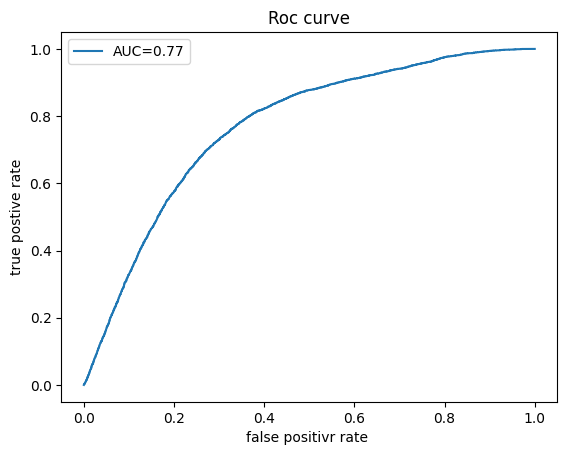

In [84]:
roc_curve(y_train,prob_1=train_prob["prob1"])

<a id='z'></a>
## 8.2 Random forest classifier ,Training and evaluation


<a id='c11'></a>
### 8.2.1 Fitting RandomForest Classifier 

In [91]:
model_rf= RandomForestClassifier()

In [92]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

<a id='c22'></a>
### 8.2.2 score check

In [93]:
model_rf.score(X_train,y_train)

0.9735961494384597

<a id='c33'></a>
### 8.2.3 Predict

In [94]:
model_pred=model_rf.predict(X_test)

In [95]:
accuracy_score(y_test,model_pred)

0.8213288665549973

<a id='c44'></a>
### 8.2.4 Hyperparameter tuning

In [96]:
params=dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

In [97]:
best_ran_model=RandomizedSearchCV(model_rf,params,random_state=7)
best_ran_model.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

<a id='c55'></a>
### 8.2.5 Best parameters

In [98]:
best_ran_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [99]:
best_model=RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'gini').fit(X_train,y_train)

In [100]:
best_model.score(X_train,y_train)

0.8512491404996562

In [101]:
best_pred_rf= best_model.predict(X_test)

### AUC curve

In [104]:
def roc_curve(y,prob_1):
    fpr,tpr,thershold=metrics.roc_curve(y,prob_1)
    aucc=metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label="AUC=%0.2f"%(aucc))
    plt.title("Roc curve")
    plt.xlabel("false positivr rate ")
    plt.ylabel("true postive rate")
    plt.legend()
    plt.show()

In [105]:
train_prob=pd.DataFrame(best_ran_model.predict_proba(X_train),columns=["prob0","prob1"])

In [106]:
test_prob=pd.DataFrame(best_ran_model.predict_proba(X_test),columns=["prob0","prob1"])
new_cutoff_predict1=np.where(test_prob["prob1"]>=.4,1,0)

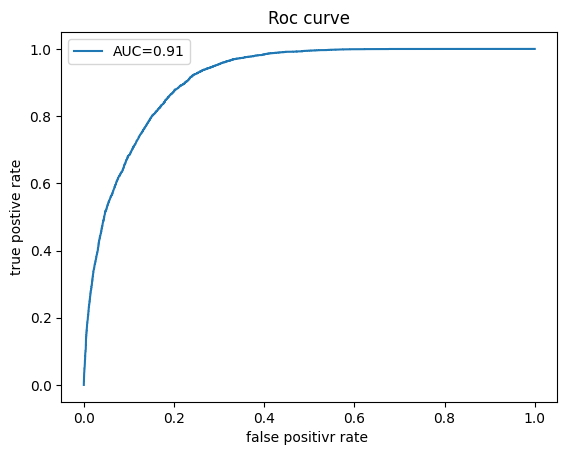

In [107]:
roc_curve(y_train,prob_1=train_prob["prob1"])

<a id='c66'></a>
### 8.2.6 Final accuracy/confusion matrix

In [102]:
from sklearn.metrics import confusion_matrix

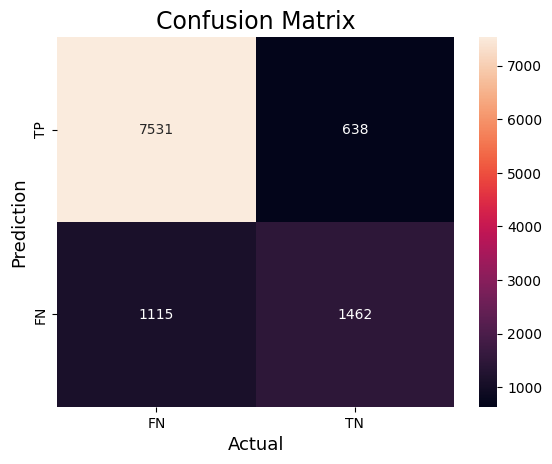

In [103]:
cm = confusion_matrix(y_test,best_pred_rf)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
           xticklabels=['FN', 'TN'],
            yticklabels=['TP', 'FN'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Finding precision and recall
accuracy = accuracy_score(y_test, best_pred_rf)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, best_pred_rf)
print("Precision :", precision)
recall = recall_score(y_test, best_pred_rf)
print("Recall    :", recall)
F1_score = f1_score(y_test, best_pred_rf)
print("F1-score  :", F1_score)

Accuracy   : 0.8337055648613437
Precision : 0.6840633737185461
Recall    : 0.5696546371750097
F1-score  : 0.6216387889053567


<a id='d1'></a>
# Conclusion

 # |<-----------Logistic ----------------|-------Randomforest----------->|
        Accuracy  : 0.7657733109994417          |       0.8337055648613437
        Precision : 0.5338600451467269          |       0.6840633737185461
        Recall    : 0.18354675979821497         |       0.5696546371750097
        F1-score  : 0.2731735489460005          |       0.6216387889053567

**we got best accuracy with RandomForest algorithm model**

**according to the accuracy use Randomforest model for Deployment**

<a id='d2'></a>
# Deployment (saving pkl file of model)

In [108]:
import os
os.getcwd()

'C:\\Users\\Subham\\PYTHON BY IMARTICUS\\capstone_pro'

In [109]:
import pickle
pickle.dump(best_model,open('adult_census_lg_rf.pkl',"wb"))